In [2]:
# database_path load from config file
from config import settings
from pathlib import Path
settings_proc ='SETTINGS1'
settings_simu = 'SETTINGS1'
root= Path(settings.data.path["processed"])
database_path = (root /settings_simu/(settings_simu.lower()+'_vas')).with_suffix('.db')
database_psd = (root /settings_simu/(settings_simu.lower())).with_suffix('.db')

In [3]:
#load the metadata as we usually do
import sqlite3
import numpy as np
conn = sqlite3.connect(database_psd)
c = conn.cursor()
c.execute("SELECT freq FROM metadata")
freq = c.fetchone()[0]
freq = np.frombuffer(freq, dtype=np.float64)


In [4]:
import sqlite3
import numpy as np

conn = sqlite3.connect(database_path)
c = conn.cursor()
c.execute("""SELECT * FROM VAS_notch WHERE system_name = 'system_1' AND amplitude_notch =0.15
          LIMIT 400""")

data = c.fetchall()
c.execute("""SELECT * FROM ORIGINAL_PSD
          WHERE system_name = 'system_1'""")
data_psd = c.fetchall()

# initialize lists to store the column data
sys_name_list = []
f_aff_list = []
amp_list = []
psd_list = []

# populate the lists with data
for row in data:
    sys_name_list.append(row[2])
    f_aff_list.append(row[3])
    amp_list.append(row[4])
    psd_list.append(np.frombuffer(row[5], dtype=np.float64))

# convert lists to numpy arrays
sys_name_array = np.array(sys_name_list)
f_aff_array = np.array(f_aff_list)
amp_array = np.array(amp_list)
psd_array = np.array(psd_list)


In [5]:
psd_orig = np.array([np.frombuffer(row[3], dtype=np.float64) for row in data_psd])


Text(0.5, 0, 'Frequency [Hz]')

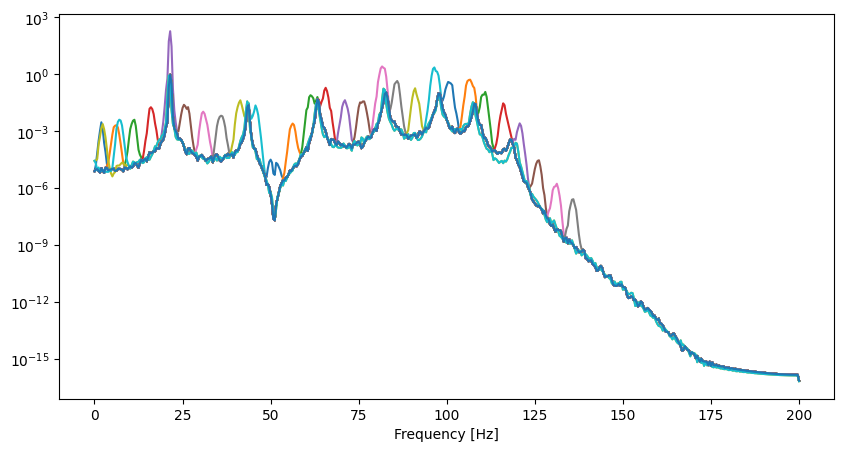

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
for i in range(0,300,10):
    ax.plot(freq,psd_array[i,:],label='freq = '+str(f_aff_list[i]))
ax.plot(freq,psd_orig[0],label='original')

ax.set_yscale('log')
ax.set_xlabel('Frequency [Hz]')


# Dataloader

In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
from psm.models.prepare_data import CreateTransformer, PSDNotchDataset, PSDNotchDatasetOriginal

cr = CreateTransformer(database_path=database_psd,freq=freq,freq_min=0,freq_max=150)
transform_psd=cr.transform_psd
transform_label=cr.transform_label
freq_axis=cr.new_freq

dataset = PSDNotchDataset(database_path=database_path, system_name='system_1', transform=transform_psd, transform_label=transform_label, preload=False)
dataset_orig = PSDNotchDatasetOriginal(database_path=database_path, system_name='system_1', transform=transform_psd, transform_label=transform_label, preload=False)


system_name=? ('system_1',)


In [9]:
import pandas as pd
from torch.utils.data import DataLoader
dl = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=0)

df = pd.DataFrame(columns=['freq','amplitude'])
for i, data in enumerate(dl):
    freq= data[3]
    amplitude = data[2]
    df = pd.concat([df,pd.DataFrame({'freq':freq,'amplitude':amplitude})],axis=0)

In [10]:
#unique and count each possible value of amplitude and for each frequency
df_ = df.groupby(['freq','amplitude']).size().reset_index(name='counts')
#plot the result in a heatmap with frequency on the x-axis and amplitude on the y-axis
df_.pivot(index='amplitude', columns='freq', values='counts')


freq,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0,10.5,11.0,11.5,12.0,12.5,13.0,13.5,14.0,14.5,15.0,15.5,16.0,16.5,17.0,17.5,18.0,18.5,19.0,19.5,20.0,20.5,21.0,21.5,22.0,22.5,23.0,23.5,24.0,24.5,25.0,25.5,26.0,26.5,27.0,27.5,28.0,28.5,29.0,29.5,30.0,30.5,31.0,31.5,32.0,32.5,33.0,33.5,34.0,34.5,35.0,35.5,36.0,36.5,37.0,37.5,38.0,38.5,39.0,39.5,40.0,40.5,41.0,41.5,42.0,42.5,43.0,43.5,44.0,44.5,45.0,45.5,46.0,46.5,47.0,47.5,48.0,48.5,49.0,49.5,50.0,50.5,51.0,51.5,52.0,52.5,53.0,53.5,54.0,54.5,55.0,55.5,56.0,56.5,57.0,57.5,58.0,58.5,59.0,59.5,60.0,60.5,61.0,61.5,62.0,62.5,63.0,63.5,64.0,64.5,65.0,65.5,66.0,66.5,67.0,67.5,68.0,68.5,69.0,69.5,70.0,70.5,71.0,71.5,72.0,72.5,73.0,73.5,74.0,74.5,75.0,75.5,76.0,76.5,77.0,77.5,78.0,78.5,79.0,79.5,80.0,80.5,81.0,81.5,82.0,82.5,83.0,83.5,84.0,84.5,85.0,85.5,86.0,86.5,87.0,87.5,88.0,88.5,89.0,89.5,90.0,90.5,91.0,91.5,92.0,92.5,93.0,93.5,94.0,94.5,95.0,95.5,96.0,96.5,97.0,97.5,98.0,98.5,99.0,99.5,100.0,100.5,101.0,101.5,102.0,102.5,103.0,103.5,104.0,104.5,105.0,105.5,106.0,106.5,107.0,107.5,108.0,108.5,109.0,109.5,110.0,110.5,111.0,111.5,112.0,112.5,113.0,113.5,114.0,114.5,115.0,115.5,116.0,116.5,117.0,117.5,118.0,118.5,119.0,119.5,120.0,120.5,121.0,121.5,122.0,122.5,123.0,123.5,124.0,124.5,125.0,125.5,126.0,126.5,127.0,127.5,128.0,128.5,129.0,129.5,130.0,130.5,131.0,131.5,132.0,132.5,133.0,133.5,134.0,134.5,135.0,135.5,136.0,136.5,137.0,137.5,138.0,138.5,139.0,139.5
amplitude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-0.35,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
-0.30,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
-0.25,200,200,200,2

In [18]:
len(df_)*200*20 /1e6

16.68

In [12]:
for psd_orig in dataset_orig:
    healthy = psd_orig[0]
    

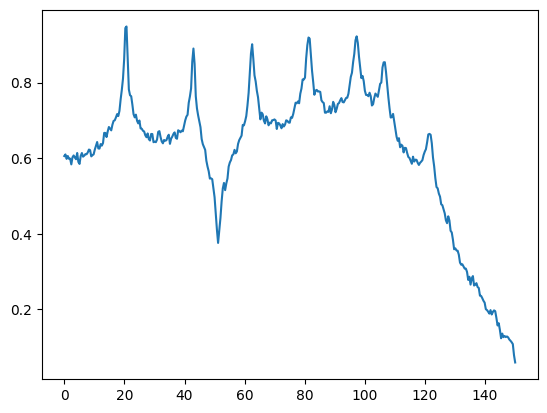

In [13]:
plt.plot(freq_axis,healthy,label='original')
